In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import requests

# Function for converting a list of proteins with their common name to a list of proteins with the appropriate STING identifier

In [2]:
def get_protein_IDS(proteins): 
    string_api_url = "https://version-11-5.string-db.org/api"
    output_format = "tsv-no-header"
    method = "get_string_ids"
    # Set parameters
    params = {
    "identifiers" : "\r".join(proteins), # your protein list
    "species" : 9606, # species NCBI identifier 
    "limit" : 1, # only one (best) identifier per input protein
    "echo_query" : 1, # see your input identifiers in the output
    "caller_identity" : "www.awesome_app.org" # your app name 
    }
    # construct URL
    request_url = "/".join([string_api_url, output_format, method])
    # Call STRING database
    results = requests.post(request_url, data=params)
    # get the STRING ID for the proteins of interest and append them to prot list
    prot = list()
    for line in results.text.strip().split("\n"):
        l = line.split("\t")
        input_identifier, string_identifier = l[0], l[2]
        prot.append(string_identifier) 
    return prot

# Function that given the sting identifier list of proteins will output a networkx graph object of the protein interaction graph

In [3]:
def get_interaction_data(proteins, limit): 
    string_api_url = "https://version-11-5.string-db.org/api"
    output_format = "tsv-no-header"
    method = "network"
    
    request_url = "/".join([string_api_url, output_format, method])
    params = {

        "identifiers" : "%0d".join(proteins), # your protein
        "species" : 9606, # species NCBI identifier 
        "limit" : limit,
        "caller_identity" : "www.awesome_app.org" # your app name

    }

    response = requests.post(request_url, data=params)

    # interacting proteins 1 
    proteins_1 = list() 
    # interacting proteins 2
    proteins_2 = list() 
    # score of interaction
    scores = list()
    # from the responses get the interaction proteins and the respective score of interaction
    for line in response.text.strip().split("\n"):
        score = float(line.split("\t")[5]) 
        prot_1 = line.split("\t")[2]
        prot_2 = line.split("\t")[3]
        # filter out confidence scores less than 0.4 
        if score > 0.4: 
            proteins_1.append(prot_1) 
            proteins_2.append(prot_2)
            scores.append(score) 
    # Create a data frame that represent the interaction dataset and includes the confidence score        
    df = pd.DataFrame(list(zip(proteins_1, proteins_2, scores)),
               columns =['Protein 1', 'Protein 2', 'Score'])
    # convert the pandas data frame to a networkx
    G = nx.from_pandas_edgelist(df, 'Protein 1', 'Protein 2', 'Score')
    # return the network x graph
    return(G)
    

# Apply functions to retrieve the graph of interest

- Interactome between MMP and IRS
- IGF1R seems to the middle ground node in the connecting MMPs and INS receptors

## Figure 1: MMPs and Insulin Receptors

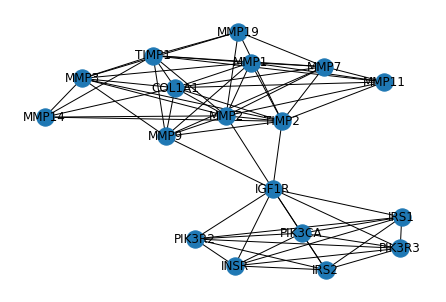

In [12]:
# proteins of interest
prot = ["MMP1", "MMP2","MMP3","MMP9", "MMP11","MMP7",  "MMP14", "IRS1", "IRS2", "INSR", "COL1A1", "MMP19"]
# get the STRING IDs of the proteins 
limit = 10
prot_IDs = get_protein_IDS(prot)
# Get the networkx graph from the protein IDs
G = get_interaction_data(prot_IDs, 6)
# draw graph for viz purposes
nx.draw_kamada_kawai(G, with_labels = True)

## Figure 2: MMPs and Insulin Receptors, Glucagon associated proteins

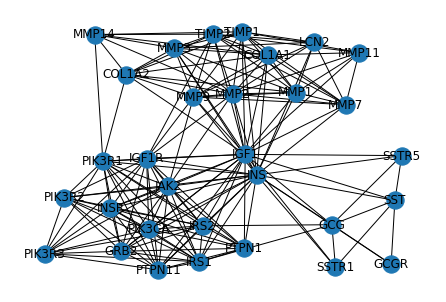

In [13]:
# proteins of interest
prot = ["MMP1", "MMP2","MMP3","MMP9", "MMP11","MMP7",  "MMP14", "IRS1", "IRS2", "INSR", "COL1A1", "GCG", "GCGR",
       "SSTR5", "SSTR1", "IR", "GABA", "GABRR3", "SST", "MMP1", "MMP2", "MMP9"]
# get the STRING IDs of the proteins 
limit = 10
prot_IDs = get_protein_IDS(prot)
# Get the networkx graph from the protein IDs
G = get_interaction_data(prot_IDs, 15)
# draw graph for viz purposes
nx.draw_kamada_kawai(G, with_labels = True)

In [9]:
print(sorted(G.degree, key=lambda x: x[1], reverse=True))

[('MMP2', 11), ('TIMP2', 10), ('COL1A1', 9), ('TIMP1', 9), ('IGF1R', 9), ('MMP7', 8), ('MMP1', 8), ('MMP9', 8), ('MMP3', 8), ('MMP11', 6), ('PIK3R2', 6), ('INSR', 6), ('IRS2', 6), ('PIK3R3', 6), ('IRS1', 6), ('PIK3CA', 6), ('MMP19', 5), ('MMP14', 5)]


## Figure 2: MMPs and Insulin Receptors, IGFs, IGFBPs

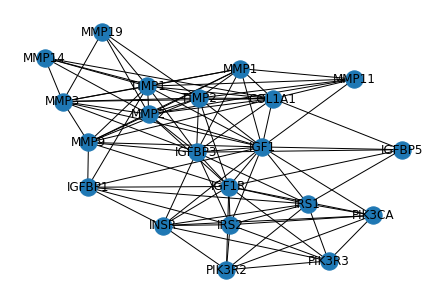

In [10]:
# proteins of interest
prot = ["MMP1", "MMP2", "MMP3", "MMP9", "MMP11", "MMP14", "IRS1", "IRS2", "INSR", "COL1A1", "MMP19", "IGF1", "IGFBP3", "IGFBP1","IGF1R"]
# get the STRING IDs of the proteins 
limit = 10
prot_IDs = get_protein_IDS(prot)
# Get the networkx graph from the protein IDs
G = get_interaction_data(prot_IDs, 6)
# draw graph for viz purposes
nx.draw_kamada_kawai(G, with_labels = True)

In [14]:
print(sorted(G.degree, key=lambda x: x[1], reverse=True))

[('AKT1', 22), ('IGF1', 16), ('MMP2', 15), ('IGFBP3', 15), ('TIMP1', 13), ('MMP3', 13), ('COL1A1', 12), ('TIMP2', 12), ('MMP1', 12), ('MMP9', 12), ('IGF1R', 12), ('IRS1', 11), ('CRP', 10), ('INSR', 8), ('IRS2', 8), ('MMP11', 7), ('MPO', 7), ('MMP14', 6), ('PIK3R2', 6), ('PIK3R3', 6), ('IGFBP5', 6), ('MMP19', 4), ('PHLPP1', 2), ('PDK1', 1)]


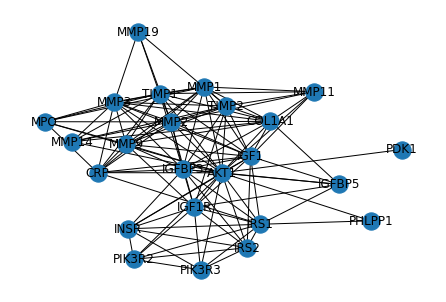

In [12]:
# proteins of interest
prot = ["CRP","MPO","PDK1", "Akt","MMP1", "MMP2", "MMP3", "MMP9", "MMP11", "MMP14", "IRS1", "IRS2", "INSR", "COL1A1", "MMP19", "IGF1", "IGFBP3", "IGF1R"]
# get the STRING IDs of the proteins 
limit = 10
prot_IDs = get_protein_IDS(prot)
# Get the networkx graph from the protein IDs
G = get_interaction_data(prot_IDs, 6)
# draw graph for viz purposes
nx.draw_kamada_kawai(G, with_labels = True)

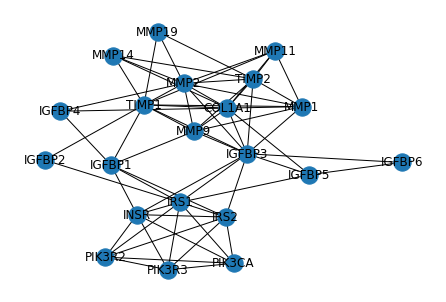

In [124]:
# proteins of interest
prot = ["MMP1", "MMP2",  "MMP9", "MMP11", "MMP14", "IRS1", "IRS2", "INSR", "COL1A1", "MMP19", "IGFBP1", "IGFBP2", "IGFBP3", "IGFBP4", "IGFBP5", "IGFBP6"]
# get the STRING IDs of the proteins 
limit = 5
prot_IDs = get_protein_IDS(prot)
# Get the networkx graph from the protein IDs
G = get_interaction_data(prot_IDs, limit)
# draw graph for viz purposes
nx.draw_kamada_kawai(G, with_labels = True)

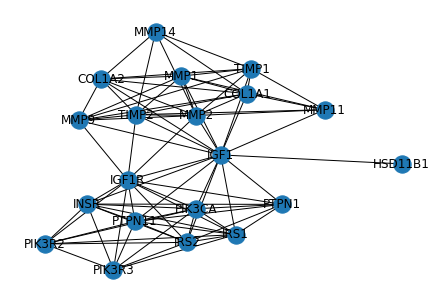

In [125]:
# proteins of interest
prot = ["MMP1","HSD11B1", "MMP2",  "MMP9", "MMP11", "MMP14", "IRS1", "IRS2", "INSR", "COL1A1"]
# get the STRING IDs of the proteins 
limit = 20
prot_IDs = get_protein_IDS(prot)
# Get the networkx graph from the protein IDs
G = get_interaction_data(prot_IDs, 10)
# draw graph for viz purposes
nx.draw_kamada_kawai(G, with_labels = True)

- Network with the addition of IGF1R proteins

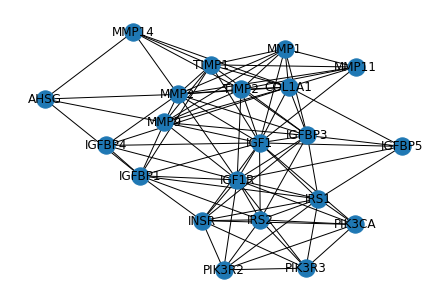

In [126]:
# proteins of interest
prot = ["MMP1", "MMP2",  "MMP9", "MMP11", "MMP14", "IRS1", "IRS2", "INSR", "COL1A1", "IGF1", "IGFBP3", "IGF1R", "IGFBP5", "IGFBP4", "AHSG"]
# get the STRING IDs of the proteins 
prot_IDs = get_protein_IDS(prot)
# Get the networkx graph from the protein IDs
limit = 6
G_IGF = get_interaction_data(prot_IDs, limit)
# draw graph for viz purposes
nx.draw_kamada_kawai(G_IGF, with_labels = True)

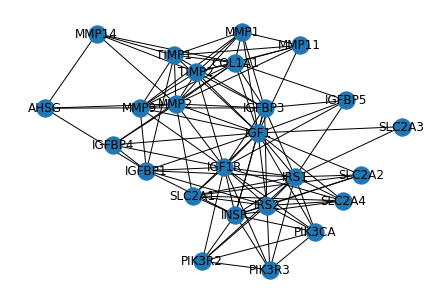

In [127]:
# proteins of interest
prot = ["MMP1", "MMP2",  "MMP9", "MMP11", "MMP14", "IRS1", "IRS2", "INSR", "COL1A1", "IGF1","GLUT1", "GLUT2", "GLUT3", "GLUT4", "IGFBP3", "IGF1R", "IGFBP5", "IGFBP4", "AHSG"]
# get the STRING IDs of the proteins 
prot_IDs = get_protein_IDS(prot)
# Get the networkx graph from the protein IDs
limit = 6
G_IGF = get_interaction_data(prot_IDs, limit)
# draw graph for viz purposes
nx.draw_kamada_kawai(G_IGF, with_labels = True)

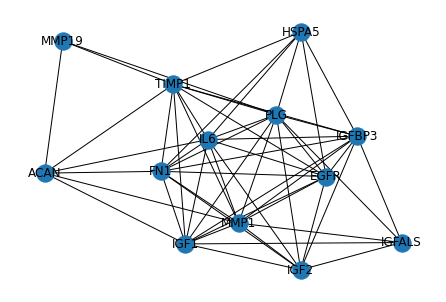

In [129]:
# proteins of interest
prot = ["MMP19", "IGFBP3", "MMP1"]
# get the STRING IDs of the proteins 
prot_IDs = get_protein_IDS(prot)
# Get the networkx graph from the protein IDs
limit = 10
G_IGF = get_interaction_data(prot_IDs, limit)
# draw graph for viz purposes
nx.draw_kamada_kawai(G_IGF, with_labels = True)

# Downstream Analysis

### Get the degree numeric of each node and sort each node based on it
- degree represents how many connections each node has

In [72]:
print(sorted(G.degree, key=lambda x: x[1], reverse=True))

[('MMP2', 9), ('IGF1R', 9), ('COL1A1', 7), ('TIMP2', 7), ('MMP9', 7), ('TIMP1', 6), ('MMP1', 6), ('PIK3R2', 6), ('INSR', 6), ('IRS2', 6), ('PIK3R3', 6), ('IRS1', 6), ('PIK3CA', 6), ('MMP11', 5), ('MMP14', 5), ('AHSG', 3)]


- Get degree measures fro IGF graph

In [73]:
print(sorted(G_IGF.degree, key=lambda x: x[1], reverse=True))

[('IGF1', 16), ('IGF1R', 14), ('MMP2', 12), ('IGFBP3', 12), ('COL1A1', 11), ('MMP9', 10), ('IRS1', 10), ('TIMP1', 9), ('TIMP2', 9), ('IGFBP1', 9), ('INSR', 9), ('IRS2', 9), ('MMP1', 8), ('PIK3CA', 7), ('MMP11', 6), ('PIK3R2', 6), ('PIK3R3', 6), ('MMP14', 5), ('IGFBP4', 5), ('IGFBP5', 5), ('AHSG', 4)]


## Get the PageRank of each node
- PageRank ranks the nodes based on how important they are by looking at the edge they are connected to
- for example a node that isn't connected to other nodes would deem a less important edge than a node that has a high degree


In [74]:
pageranks = nx.pagerank(G) # A dictionary
print(sorted(pageranks, key=lambda x: x[1], reverse=True))

['IRS2', 'IRS1', 'COL1A1', 'INSR', 'MMP11', 'MMP2', 'MMP1', 'MMP9', 'MMP14', 'TIMP1', 'TIMP2', 'PIK3R2', 'PIK3R3', 'PIK3CA', 'AHSG', 'IGF1R']


In [75]:
pageranks = nx.pagerank(G_IGF) # A dictionary
print(sorted(pageranks, key=lambda x: x[1], reverse=True))

['IRS2', 'IRS1', 'COL1A1', 'INSR', 'MMP11', 'MMP2', 'MMP1', 'MMP9', 'MMP14', 'TIMP1', 'TIMP2', 'PIK3R2', 'PIK3R3', 'PIK3CA', 'AHSG', 'IGF1', 'IGFBP3', 'IGFBP1', 'IGFBP4', 'IGF1R', 'IGFBP5']
